### Importing required Python modules

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

### Ingesting dataset for analysis

In [138]:
os.chdir('.')

file_path = "./onlinefraud.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Observing shape of the dataset

In [139]:
print(f"This dataset has {df.shape[0]} rows")
print(f"This dataset has {df.shape[1]} columns")

This dataset has 6362620 rows
This dataset has 11 columns


### Observing data types

In [140]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


## 1. Determining differences between the rows with isFlaggedFraud=0 and isFlaggedFraud=1

### 1A. Getting counts of rows for each case

In [141]:
print(f"The number of rows in the dataset having isFlaggedFraud=0 are {df['isFlaggedFraud'].value_counts()[0]}")
print(f"The number of rows in the dataset having isFlaggedFraud=1 are {df['isFlaggedFraud'].value_counts()[1]}")

The number of rows in the dataset having isFlaggedFraud=0 are 6362604
The number of rows in the dataset having isFlaggedFraud=1 are 16


### 1B. Separating out rows based on the column isFlaggedFraud

In [142]:
flagged_frauds_df = pd.DataFrame(df[df['isFlaggedFraud']==1])
not_flagged_frauds_df = pd.DataFrame(df[df['isFlaggedFraud']==0])

### 1C. Comparing the minimum & maximum amounts between both cases

In [143]:
print(f"The minimum amount in the dataset within the non flagged transactions subset is {not_flagged_frauds_df['amount'].min()}")
print(f"The minimum amount in the dataset within the flagged transactions subset is {flagged_frauds_df['amount'].min()}")

The minimum amount in the dataset within the non flagged transactions subset is 0.0
The minimum amount in the dataset within the flagged transactions subset is 353874.22


In [144]:
print(f"The maximum amount in the dataset within the non flagged transactions subset is {not_flagged_frauds_df['amount'].max()}")
print(f"The maximum amount in the dataset within the flagged transactions subset is {flagged_frauds_df['amount'].max()}")

The maximum amount in the dataset within the non flagged transactions subset is 92445516.64
The maximum amount in the dataset within the flagged transactions subset is 10000000.0


### 1D. What is the relationship between isFlaggedFraud and isFraud column ?

In [145]:
flagged_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


#### All 16 flagged transactions were fraud. None of the transactions involved any merchants. 
#### All amounts were higher than 200,000. These transactions were canceled by the system.
#### The documentation says that these transactions should not be considered for further analytics

### Removing the rows with isFlaggedFraud=1 (as recommeded by the dataset's creator)

In [146]:
df = df[df['isFlaggedFraud'] !=1]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [147]:
not_frauds_df = pd.DataFrame(df[df['isFraud']==0])
frauds_df = pd.DataFrame(df[df['isFraud']==1])

In [148]:
df['orgCustomerType'] = df['nameOrig'].str[0]
df['destCustomerType'] = df['nameDest'].str[0]

In [149]:
df['orgCustomerType'].value_counts()

orgCustomerType
C    6362604
Name: count, dtype: int64

In [150]:
df['destCustomerType'].value_counts()

destCustomerType
C    4211109
M    2151495
Name: count, dtype: int64

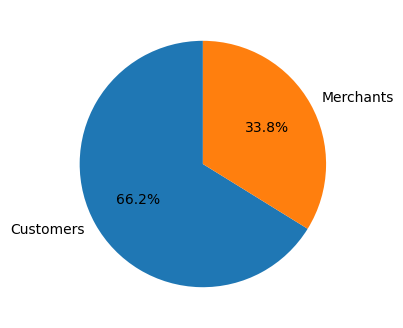

In [151]:
n_counts_c = df['destCustomerType'].value_counts()[0]
n_counts_m = df['destCustomerType'].value_counts()[1]

# Creating dataset
labels = ['Customers', 'Merchants']

data = [n_counts_c, n_counts_m]

# Creating plot
fig = plt.figure(figsize=(5, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)

# show plot
plt.show()

In [152]:
frauds_df['orgCustomerType'] = frauds_df['nameOrig'].str[0]
frauds_df['destCustomerType'] = frauds_df['nameDest'].str[0]

frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,C,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,C,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,C


In [153]:
frauds_df['orgCustomerType'].value_counts()

orgCustomerType
C    8197
Name: count, dtype: int64

In [154]:
frauds_df['destCustomerType'].value_counts()

destCustomerType
C    8197
Name: count, dtype: int64

In [155]:
not_frauds_df['orgCustomerType'] = not_frauds_df['nameOrig'].str[0]
not_frauds_df['destCustomerType'] = not_frauds_df['nameDest'].str[0]

not_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0,C,M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0,C,M
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0,C,M
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0,C,M
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0,C,C
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0,C,C
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0,C,C


In [156]:
not_frauds_df['orgCustomerType'].value_counts()

orgCustomerType
C    6354407
Name: count, dtype: int64

In [157]:
not_frauds_df['destCustomerType'].value_counts()

destCustomerType
C    4202912
M    2151495
Name: count, dtype: int64

In [158]:
not_frauds_df = not_frauds_df[not_frauds_df['destCustomerType'] != "M"]
not_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0,C,C
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0,C,C
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0,0,C,C
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.00,0.00,0,0,C,C
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.00,C784108220,345042.13,662219.61,0,0,C,C
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0,C,C
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0,C,C
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0,C,C


In [159]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceDest'] - frauds_df['oldbalanceDest']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['oldbalanceDest']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 186727.63768505031
The average value of diffs in Fraudulent transactions are : 736893.5632743686


C:\Users\Pravina.Prajapati\AppData\Local\Temp\ipykernel_24908\1740282389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['oldbalanceDest']


In [160]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceDest'] - frauds_df['newbalanceOrig']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['newbalanceOrig']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 589481.0665288282
The average value of diffs in Fraudulent transactions are : 1104697.313473222


C:\Users\Pravina.Prajapati\AppData\Local\Temp\ipykernel_24908\470572971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['newbalanceOrig']


In [161]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceOrig'] - frauds_df['oldbalanceOrg']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceOrig'] - not_frauds_df['oldbalanceOrg']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 38253.207304656884
The average value of diffs in Fraudulent transactions are : -1460119.477911431


C:\Users\Pravina.Prajapati\AppData\Local\Temp\ipykernel_24908\632296387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceOrig'] - not_frauds_df['oldbalanceOrg']


### Now observing the shape of updated dataframe

In [162]:
print(f"This dataset has {df.shape[0]} rows after removing the FlaggedFraud transactions")
print(f"This dataset has {df.shape[1]} columns after removing the FlaggedFraud transactions")

This dataset has 6362604 rows after removing the FlaggedFraud transactions
This dataset has 13 columns after removing the FlaggedFraud transactions


## 2. Determining differences between the rows with isFraud=0 and isFraud=1

### 2A. Getting counts of rows for each case

In [163]:
print(f"The number of rows in the dataset having isFraud=0 are {df['isFraud'].value_counts()[0]}")
print(f"The number of rows in the dataset having isFraud=1 are {df['isFraud'].value_counts()[1]}")

The number of rows in the dataset having isFraud=0 are 6354407
The number of rows in the dataset having isFraud=1 are 8197


### 2B. Separating out rows based on the column isFraud

In [164]:
not_frauds_df = pd.DataFrame(df[df['isFraud']==0])
frauds_df = pd.DataFrame(df[df['isFraud']==1])

### 2C. Observing the unique values in TYPE column in each case

In [165]:
print(f"The unique values of TYPE column in Non-Fradulent transactions are : {not_frauds_df['type'].unique()}")
print(f"The unique values of TYPE column in Fradulent transactions are : {frauds_df['type'].unique()}")

The unique values of TYPE column in Non-Fradulent transactions are : ['PAYMENT' 'DEBIT' 'CASH_OUT' 'TRANSFER' 'CASH_IN']
The unique values of TYPE column in Fradulent transactions are : ['TRANSFER' 'CASH_OUT']


### 2D. Observing the amount stats in both cases

In [166]:
print(f"The average value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].mean()}")
print(f"The average value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].mean()}")

The average value of executed transactions in Non-Fraudulent transactions are : 178197.04172740763
The average value of executed transactions in Fraudulent transactions are : 1461343.157758936


In [167]:
print(f"The maximum value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].max()}")
print(f"The maximum value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].max()}")

The maximum value of executed transactions in Non-Fraudulent transactions are : 92445516.64
The maximum value of executed transactions in Fraudulent transactions are : 10000000.0


In [168]:
print(f"The minimum value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].min()}")
print(f"The minimum value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].min()}")

The minimum value of executed transactions in Non-Fraudulent transactions are : 0.01
The minimum value of executed transactions in Fraudulent transactions are : 0.0


In [169]:
print(f"The standard deviation between executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].std()}")
print(f"The standard deviation between executed transactions in Fraudulent transactions are : {frauds_df['amount'].std()}")

The standard deviation between executed transactions in Non-Fraudulent transactions are : 596236.9813471739
The standard deviation between executed transactions in Fraudulent transactions are : 2397046.563628229


In [170]:
print(f"The coefficient of variance of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].std()/not_frauds_df['amount'].mean()}")
print(f"The coefficient of variance of executed transactions in Fraudulent transactions are : {frauds_df['amount'].std()/frauds_df['amount'].mean()}")

The coefficient of variance of executed transactions in Non-Fraudulent transactions are : 3.345942085050167
The coefficient of variance of executed transactions in Fraudulent transactions are : 1.6403036828832553


### 2D. Observing the oldbalanceOrg stats in both cases

In [171]:
print(f"The average value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].mean()}")
print(f"The average value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].mean()}")

The average value of oldbalanceOrg in Non-Fraudulent transactions are : 832828.7117272632
The average value of oldbalanceOrg in Fraudulent transactions are : 1637627.6859241184


In [172]:
print(f"The maximum value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].max()}")
print(f"The maximum value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].max()}")

The maximum value of oldbalanceOrg in Non-Fraudulent transactions are : 43818855.3
The maximum value of oldbalanceOrg in Fraudulent transactions are : 59585040.37


In [173]:
print(f"The minimum value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].min()}")
print(f"The minimum value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].min()}")

The minimum value of oldbalanceOrg in Non-Fraudulent transactions are : 0.0
The minimum value of oldbalanceOrg in Fraudulent transactions are : 0.0


In [174]:
print(f"The standard deviation between oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].std()}")
print(f"The standard deviation between oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].std()}")

The standard deviation between oldbalanceOrg in Non-Fraudulent transactions are : 2887144.03036968
The standard deviation between oldbalanceOrg in Fraudulent transactions are : 3528099.5182469995


In [175]:
print(f"The coefficient of variance of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].std()/not_frauds_df['oldbalanceOrg'].mean()}")
print(f"The coefficient of variance of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].std()/frauds_df['oldbalanceOrg'].mean()}")

The coefficient of variance of oldbalanceOrg in Non-Fraudulent transactions are : 3.4666720655941665
The coefficient of variance of oldbalanceOrg in Fraudulent transactions are : 2.15439659977175


### 2E. Observing the newbalanceOrig stats in both cases

In [176]:
print(f"The average value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].mean()}")
print(f"The average value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].mean()}")

The average value of newbalanceOrig in Non-Fraudulent transactions are : 855970.2281088118
The average value of newbalanceOrig in Fraudulent transactions are : 177508.20801268757


In [177]:
print(f"The maximum value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].max()}")
print(f"The maximum value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].max()}")

The maximum value of newbalanceOrig in Non-Fraudulent transactions are : 43686616.33
The maximum value of newbalanceOrig in Fraudulent transactions are : 49585040.37


In [178]:
print(f"The minimum value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].min()}")
print(f"The minimum value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].min()}")

The minimum value of newbalanceOrig in Non-Fraudulent transactions are : 0.0
The minimum value of newbalanceOrig in Fraudulent transactions are : 0.0


In [179]:
print(f"The standard deviation between newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].std()}")
print(f"The standard deviation between newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].std()}")

The standard deviation between newbalanceOrig in Non-Fraudulent transactions are : 2924986.9646518226
The standard deviation between newbalanceOrig in Fraudulent transactions are : 1915377.846506979


In [180]:
print(f"The coefficient of variance of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].std()/not_frauds_df['newbalanceOrig'].mean()}")
print(f"The coefficient of variance of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].std()/frauds_df['newbalanceOrig'].mean()}")

The coefficient of variance of newbalanceOrig in Non-Fraudulent transactions are : 3.417159696213167
The coefficient of variance of newbalanceOrig in Fraudulent transactions are : 10.790362135648824


### 2F. Observing the oldbalanceDest stats in both cases

In [181]:
print(f"The average value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].mean()}")
print(f"The average value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].mean()}")

The average value of oldbalanceDest in Non-Fraudulent transactions are : 1101420.8745693793
The average value of oldbalanceDest in Fraudulent transactions are : 545311.9582115408


In [182]:
print(f"The maximum value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].max()}")
print(f"The maximum value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].max()}")

The maximum value of oldbalanceDest in Non-Fraudulent transactions are : 356015889.35
The maximum value of oldbalanceDest in Fraudulent transactions are : 236230516.82


In [183]:
print(f"The minimum value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].min()}")
print(f"The minimum value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].min()}")

The minimum value of oldbalanceDest in Non-Fraudulent transactions are : 0.0
The minimum value of oldbalanceDest in Fraudulent transactions are : 0.0


In [184]:
print(f"The standard deviation between oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].std()}")
print(f"The standard deviation between oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].std()}")

The standard deviation between oldbalanceDest in Non-Fraudulent transactions are : 3399201.7933451207
The standard deviation between oldbalanceDest in Fraudulent transactions are : 3339589.2539171097


In [185]:
print(f"The coefficient of variance of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].std()/not_frauds_df['oldbalanceDest'].mean()}")
print(f"The coefficient of variance of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].std()/frauds_df['oldbalanceDest'].mean()}")

The coefficient of variance of oldbalanceDest in Non-Fraudulent transactions are : 3.0861969950170964
The coefficient of variance of oldbalanceDest in Fraudulent transactions are : 6.124181220727229


### 2G. Observing the newbalanceDest stats in both cases

In [186]:
print(f"The average value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].mean()}")
print(f"The average value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].mean()}")

The average value of newbalanceDest in Non-Fraudulent transactions are : 1224925.6845631592
The average value of newbalanceDest in Fraudulent transactions are : 1282205.5214859096


In [187]:
print(f"The maximum value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].max()}")
print(f"The maximum value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].max()}")

The maximum value of newbalanceDest in Non-Fraudulent transactions are : 356179278.92
The maximum value of newbalanceDest in Fraudulent transactions are : 236726494.66


In [188]:
print(f"The minimum value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].min()}")
print(f"The minimum value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].min()}")

The minimum value of newbalanceDest in Non-Fraudulent transactions are : 0.0
The minimum value of newbalanceDest in Fraudulent transactions are : 0.0


In [189]:
print(f"The standard deviation between newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].std()}")
print(f"The standard deviation between newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].std()}")

The standard deviation between newbalanceDest in Non-Fraudulent transactions are : 3673815.709962235
The standard deviation between newbalanceDest in Fraudulent transactions are : 3912220.6495843115


In [190]:
print(f"The coefficient of variance of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].std()/not_frauds_df['newbalanceDest'].mean()}")
print(f"The coefficient of variance of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].std()/frauds_df['newbalanceDest'].mean()}")

The coefficient of variance of newbalanceDest in Non-Fraudulent transactions are : 2.9992151819989097
The coefficient of variance of newbalanceDest in Fraudulent transactions are : 3.0511650308996923


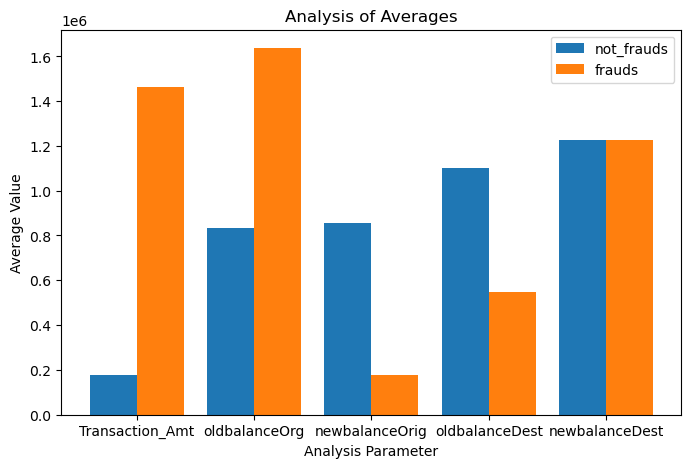

In [191]:
X = ['Transaction_Amt','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'] 
not_frauds = [not_frauds_df['amount'].mean(), not_frauds_df['oldbalanceOrg'].mean(),not_frauds_df['newbalanceOrig'].mean(),not_frauds_df['oldbalanceDest'].mean(), not_frauds_df['newbalanceDest'].mean()] 
frauds = [frauds_df['amount'].mean(),frauds_df['oldbalanceOrg'].mean(),frauds_df['newbalanceOrig'].mean(),frauds_df['oldbalanceDest'].mean(), not_frauds_df['newbalanceDest'].mean()] 
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, not_frauds, 0.4, label = 'not_frauds') 
plt.bar(X_axis + 0.2, frauds, 0.4, label = 'frauds') 
plt.xticks(X_axis, X) 
plt.xlabel("Analysis Parameter") 
plt.ylabel("Average Value") 
plt.title("Analysis of Averages") 
plt.legend() 
plt.show() 

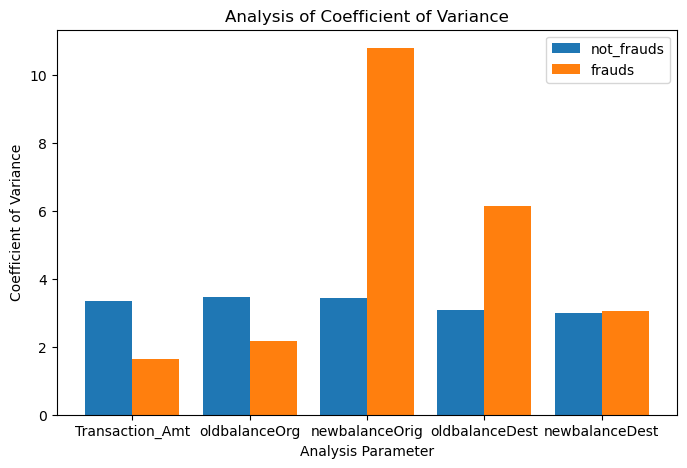

In [192]:
X = ['Transaction_Amt','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'] 
not_frauds = [not_frauds_df['amount'].std()/not_frauds_df['amount'].mean(),
              not_frauds_df['oldbalanceOrg'].std()/not_frauds_df['oldbalanceOrg'].mean(),
              not_frauds_df['newbalanceOrig'].std()/not_frauds_df['newbalanceOrig'].mean(),
              not_frauds_df['oldbalanceDest'].std()/not_frauds_df['oldbalanceDest'].mean(), 
              not_frauds_df['newbalanceDest'].std()/not_frauds_df['newbalanceDest'].mean()
             ] 
frauds = [frauds_df['amount'].std()/frauds_df['amount'].mean(),
              frauds_df['oldbalanceOrg'].std()/frauds_df['oldbalanceOrg'].mean(),
              frauds_df['newbalanceOrig'].std()/frauds_df['newbalanceOrig'].mean(),
              frauds_df['oldbalanceDest'].std()/frauds_df['oldbalanceDest'].mean(), 
              frauds_df['newbalanceDest'].std()/frauds_df['newbalanceDest'].mean()
             ] 
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, not_frauds, 0.4, label = 'not_frauds') 
plt.bar(X_axis + 0.2, frauds, 0.4, label = 'frauds') 
plt.xticks(X_axis, X) 
plt.xlabel("Analysis Parameter") 
plt.ylabel("Coefficient of Variance") 
plt.title("Analysis of Coefficient of Variance") 
plt.legend() 
plt.show() 

## 3. Analyzing Fraudulent Customers

In [193]:
frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,C,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,C,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,C


In [194]:
frauds_df.shape

(8197, 13)

In [195]:
frauds_df.groupby("type").count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
type,,,,,,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081


## Data Cleaning

### Removing flagged rows

In [196]:
df = df[df['isFlaggedFraud'] !=1]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,C


### Removing Merchants

In [197]:
df['destCustomerType'] = df['nameDest'].str[0]
df = df[df['destCustomerType'] != "M"]

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,C,C
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0,C,C
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,C


In [198]:
df['isFraud'].value_counts()

isFraud
0    4202912
1       8197
Name: count, dtype: int64

In [199]:
target_rate = df['isFraud'].mean() * 100
target_rate

0.19465181262228073

### Target rate is 0.19%

### Removing the aux columns

In [200]:
df = df.drop(['step', 'nameOrig', 'destCustomerType', 'nameDest', 'isFlaggedFraud'], axis=1)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,C
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,C
9,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0,C
10,DEBIT,9644.94,4465.00,0.00,10845.00,157982.12,0,C
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,C
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,C
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,C
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,C


In [201]:
# Replace values in the 'transaction_type' column
replacement_dict = {
    'TRANSFER': 2,
    'CASH_OUT': 4,
    'DEBIT': 6,
    'CASH_IN': 8
}

df['transaction_type'] = df['type'].replace(replacement_dict)
df = df.drop(['type'], axis=1)

df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type
2,181.00,181.00,0.00,0.00,0.00,1,C,2
3,181.00,181.00,0.00,21182.00,0.00,1,C,4
9,5337.77,41720.00,36382.23,41898.00,40348.79,0,C,6
10,9644.94,4465.00,0.00,10845.00,157982.12,0,C,6
15,229133.94,15325.00,0.00,5083.00,51513.44,0,C,4
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,C,4
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,C,2
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C,4
6362618,850002.52,850002.52,0.00,0.00,0.00,1,C,2


In [202]:
df = df.drop("orgCustomerType", axis=1)

## Feature Generation

In [203]:
df['diff_newbalanceDest_oldbalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['diff_newbalanceDest_newbalanceOrig'] = df['newbalanceDest'] - df['newbalanceOrig']
df['diff_newbalanceOrig_oldbalanceOrg'] = df['newbalanceOrig'] - df['oldbalanceOrg']

In [204]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
2,181.00,181.00,0.00,0.00,0.00,1,2,0.00,0.00,-181.00
3,181.00,181.00,0.00,21182.00,0.00,1,4,-21182.00,0.00,-181.00
9,5337.77,41720.00,36382.23,41898.00,40348.79,0,6,-1549.21,3966.56,-5337.77
10,9644.94,4465.00,0.00,10845.00,157982.12,0,6,147137.12,157982.12,-4465.00
15,229133.94,15325.00,0.00,5083.00,51513.44,0,4,46430.44,51513.44,-15325.00
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,4,339682.13,339682.13,-339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,2,0.00,0.00,-6311409.28
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,4,6311409.27,6379898.11,-6311409.28
6362618,850002.52,850002.52,0.00,0.00,0.00,1,2,0.00,0.00,-850002.52


In [205]:
df.to_csv("./frauds_feats.csv", index=False)

## Data Splitting

In [206]:
df['isFraud'].value_counts()

isFraud
0    4202912
1       8197
Name: count, dtype: int64

In [207]:
not_frauds = df[df['isFraud']==0]
frauds = df[df['isFraud']==1]

In [208]:
not_frauds_test = not_frauds.sample(frac=0.2, random_state=1576023)
not_frauds_train = not_frauds.drop(not_frauds_test.index)

In [209]:
frauds_test = frauds.sample(frac=0.2, random_state=4014)
frauds_train = frauds.drop(frauds_test.index)

In [210]:
training_df = pd.concat([not_frauds_train, frauds_train], ignore_index=True)
training_df = training_df.sample(frac=1)

training_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
1590986,114194.17,277563.19,391757.36,544283.90,430089.72,0,8,-114194.18,38332.36,114194.17
802809,141072.26,1883801.85,2024874.11,7264201.53,7123129.27,0,8,-141072.26,5098255.16,141072.26
2217591,143915.34,727.00,144642.34,0.00,0.00,0,8,0.00,-144642.34,143915.34
2114111,125574.58,39643.00,0.00,0.00,125574.58,0,4,125574.58,125574.58,-39643.00
194072,94808.41,244962.00,150153.59,504697.80,758577.77,0,4,253879.97,608424.18,-94808.41
...,...,...,...,...,...,...,...,...,...,...
1906566,201726.71,0.00,0.00,479678.15,681404.87,0,4,201726.72,681404.87,0.00
1471228,551730.57,152662.00,0.00,2051915.35,2603645.92,0,2,551730.57,2603645.92,-152662.00
166681,79308.16,0.00,0.00,144014.29,5120.73,0,4,-138893.56,5120.73,0.00
170154,169238.34,0.00,0.00,466411.25,635649.59,0,4,169238.34,635649.59,0.00


In [211]:
out_of_sample_validation_df = pd.concat([not_frauds_test, frauds_test], ignore_index=True)
out_of_sample_validation_df = out_of_sample_validation_df.sample(frac=1)

out_of_sample_validation_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
506714,796643.72,0.00,0.00,1064309.21,1860952.93,0,2,796643.72,1860952.93,0.00
758331,154212.05,28064.00,182276.05,0.00,0.00,0,8,0.00,-182276.05,154212.05
572325,692065.14,0.00,0.00,1638484.82,2330549.96,0,2,692065.14,2330549.96,0.00
51460,135128.03,5098.00,0.00,1507950.78,1643078.81,0,4,135128.03,1643078.81,-5098.00
788658,79081.84,0.00,0.00,384256.34,463338.19,0,4,79081.85,463338.19,0.00
...,...,...,...,...,...,...,...,...,...,...
142314,332940.66,51885.00,384825.66,0.00,0.00,0,8,0.00,-384825.66,332940.66
609966,6832.56,9729435.53,9736268.09,316819.52,309986.95,0,8,-6832.57,-9426281.14,6832.56
39863,401732.11,22.00,0.00,0.00,401732.11,0,4,401732.11,401732.11,-22.00
181394,148164.72,1850589.11,1998753.83,225454.52,77289.80,0,8,-148164.72,-1921464.03,148164.72


In [212]:
training_df.to_csv("./frauds_training_data.csv", index=False)

In [213]:
out_of_sample_validation_df.to_csv("./frauds_out_of_sample_validation_data.csv", index=False)

## Down Sampling

In [214]:
os.chdir('.')

file_path = "./frauds_training_data.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,114194.17,277563.19,391757.36,544283.90,430089.72,0,8,-114194.18,38332.36,114194.17
1,141072.26,1883801.85,2024874.11,7264201.53,7123129.27,0,8,-141072.26,5098255.16,141072.26
2,143915.34,727.00,144642.34,0.00,0.00,0,8,0.00,-144642.34,143915.34
3,125574.58,39643.00,0.00,0.00,125574.58,0,4,125574.58,125574.58,-39643.00
4,94808.41,244962.00,150153.59,504697.80,758577.77,0,4,253879.97,608424.18,-94808.41


In [215]:
df.shape

(3368888, 10)

In [216]:
df['isFraud'].value_counts()

isFraud
0    3362330
1       6558
Name: count, dtype: int64

### Downsampling the 0s for increasing the target rate

In [217]:
not_frauds = df[df['isFraud']==0]
frauds = df[df['isFraud']==1]

In [83]:
not_frauds = not_frauds.sample(n=125000, random_state=14896)
not_frauds

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
1390571,42301.84,2133.00,0.00,0.00,42301.84,0,4,42301.84,42301.84,-2133.00
175571,182619.00,137879.22,320498.22,348191.35,165572.36,0,8,-182618.99,-154925.86,182619.00
1045944,28727.85,0.00,0.00,5960159.58,5988887.43,0,4,28727.85,5988887.43,0.00
2284504,92894.34,119032.80,211927.14,103514.49,10620.15,0,8,-92894.34,-201306.99,92894.34
47296,49258.29,7512127.07,7561385.36,114695.47,65437.18,0,8,-49258.29,-7495948.18,49258.29
...,...,...,...,...,...,...,...,...,...,...
87721,93077.66,19035367.94,19128445.60,3640835.72,3613761.30,0,8,-27074.42,-15514684.30,93077.66
377479,134138.91,693186.21,827325.12,287941.87,153802.97,0,8,-134138.90,-673522.15,134138.91
3305247,166231.05,0.00,0.00,1414242.99,1580474.03,0,4,166231.04,1580474.03,0.00
1746323,308772.94,10393.00,319165.94,331427.85,22654.91,0,8,-308772.94,-296511.03,308772.94


In [84]:
downsampled_training_df = pd.concat([not_frauds, frauds], ignore_index=True)
downsampled_training_df = downsampled_training_df.sample(frac=1)

downsampled_training_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
66166,196418.50,0.00,0.00,250061.52,446480.02,0,4,196418.50,446480.02,0.00
4675,61842.73,0.00,0.00,1619293.99,1681136.71,0,4,61842.72,1681136.71,0.00
98808,293016.90,0.00,0.00,704429.51,997446.42,0,2,293016.91,997446.42,0.00
24705,83302.86,4900.00,0.00,1012757.04,1096059.90,0,2,83302.86,1096059.90,-4900.00
124258,334425.65,500728.00,166302.35,179331.54,513757.19,0,2,334425.65,347454.84,-334425.65
...,...,...,...,...,...,...,...,...,...,...
131275,4731371.88,4731371.88,0.00,0.00,0.00,1,2,0.00,0.00,-4731371.88
63176,4110.54,12963.00,8852.46,848839.29,852949.83,0,6,4110.54,844097.37,-4110.54
129557,6302888.93,6302888.93,0.00,0.00,0.00,1,2,0.00,0.00,-6302888.93
29866,759163.29,0.00,0.00,4118244.80,4877408.09,0,2,759163.29,4877408.09,0.00


In [85]:
downsampled_training_df.to_csv("./downsampled_training_df.csv", index=False)

In [86]:
os.chdir('.')

file_path = "./downsampled_training_df.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,196418.50,0.0,0.00,250061.52,446480.02,0,4,196418.50,446480.02,0.00
1,61842.73,0.0,0.00,1619293.99,1681136.71,0,4,61842.72,1681136.71,0.00
2,293016.90,0.0,0.00,704429.51,997446.42,0,2,293016.91,997446.42,0.00
3,83302.86,4900.0,0.00,1012757.04,1096059.90,0,2,83302.86,1096059.90,-4900.00
4,334425.65,500728.0,166302.35,179331.54,513757.19,0,2,334425.65,347454.84,-334425.65


In [87]:
df.shape

(131558, 10)

In [88]:
df['isFraud'].value_counts()

isFraud
0    125000
1      6558
Name: count, dtype: int64

In [89]:
target_rate = df['isFraud'].mean() * 100
target_rate

4.984873591875827

In [90]:
features = df.drop(columns=['isFraud'])
targets = df['isFraud']

In [91]:
features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,196418.50,0.00,0.00,250061.52,446480.02,4,196418.50,446480.02,0.00
1,61842.73,0.00,0.00,1619293.99,1681136.71,4,61842.72,1681136.71,0.00
2,293016.90,0.00,0.00,704429.51,997446.42,2,293016.91,997446.42,0.00
3,83302.86,4900.00,0.00,1012757.04,1096059.90,2,83302.86,1096059.90,-4900.00
4,334425.65,500728.00,166302.35,179331.54,513757.19,2,334425.65,347454.84,-334425.65
...,...,...,...,...,...,...,...,...,...
131553,4731371.88,4731371.88,0.00,0.00,0.00,2,0.00,0.00,-4731371.88
131554,4110.54,12963.00,8852.46,848839.29,852949.83,6,4110.54,844097.37,-4110.54
131555,6302888.93,6302888.93,0.00,0.00,0.00,2,0.00,0.00,-6302888.93
131556,759163.29,0.00,0.00,4118244.80,4877408.09,2,759163.29,4877408.09,0.00


### Low Variance Check

In [92]:
data_variance = features.var()
low_variance_threshold = 0.25
low_variance_columns = data_variance[data_variance < low_variance_threshold].index.tolist()

print("Variance of each column:\n", data_variance)
print("\nColumns with low variance:", low_variance_columns)

Variance of each column:
 amount                                7.970597e+11
oldbalanceOrg                         1.218513e+13
newbalanceOrig                        1.209092e+13
oldbalanceDest                        1.521133e+13
newbalanceDest                        1.766477e+13
transaction_type                      4.690623e+00
diff_newbalanceDest_oldbalanceDest    1.042549e+12
diff_newbalanceDest_newbalanceOrig    2.993259e+13
diff_newbalanceOrig_oldbalanceOrg     3.992172e+11
dtype: float64

Columns with low variance: []


### All columns have passed the low variance check

### Correlation Check

In [93]:
correlation_matrix = features.corr()

correlation_matrix

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
amount,1.000000,0.082484,-0.034788,0.158903,0.335826,-0.205922,0.775386,0.280096,-0.647149
oldbalanceOrg,0.082484,1.000000,0.983563,0.018553,0.001730,0.426453,-0.063747,-0.623785,-0.111859
newbalanceOrig,-0.034788,0.983563,1.000000,0.025166,-0.006052,0.471769,-0.121040,-0.640211,0.069414
oldbalanceDest,0.158903,0.018553,0.025166,1.000000,0.970996,-0.020863,0.177145,0.729938,0.035995
newbalanceDest,0.335826,0.001730,-0.006052,0.970996,1.000000,-0.085967,0.407321,0.772060,-0.042865
transaction_type,-0.205922,0.426453,0.471769,-0.020863,-0.085967,1.000000,-0.274173,-0.365879,0.240260
diff_newbalanceDest_oldbalanceDest,0.775386,-0.063747,-0.121040,0.177145,0.407321,-0.274173,1.000000,0.389838,-0.313938
diff_newbalanceDest_newbalanceOrig,0.280096,-0.623785,-0.640211,0.729938,0.772060,-0.365879,0.389838,1.000000,-0.077046
diff_newbalanceOrig_oldbalanceOrg,-0.647149,-0.111859,0.069414,0.035995,-0.042865,0.240260,-0.313938,-0.077046,1.000000


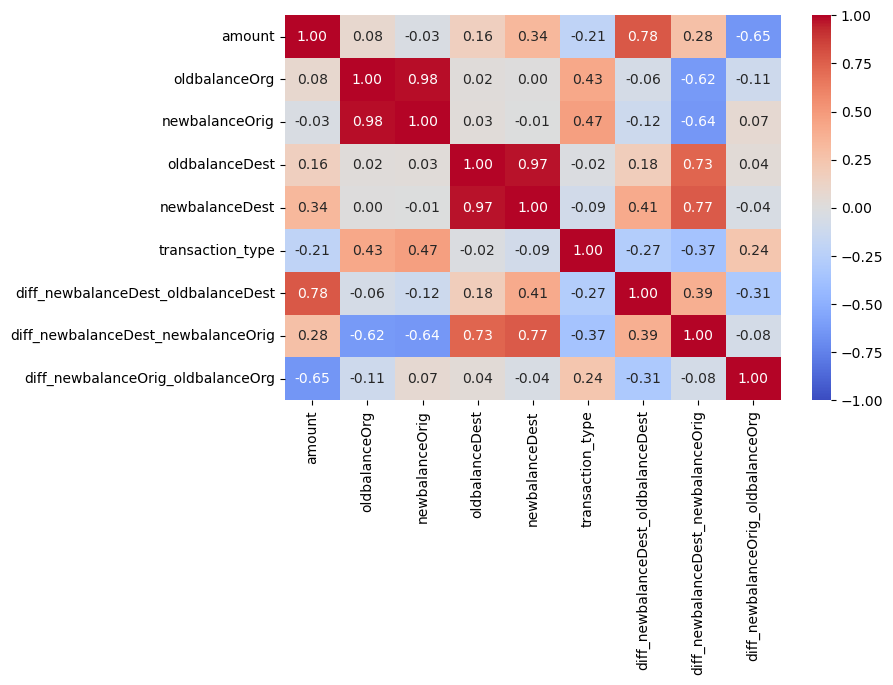

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Generate a heatmap with annotated values
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

### Removing one of the features from pairs with correlation more than 0.85

In [95]:
drop_feats = ['oldbalanceOrg', 'oldbalanceDest']
features = features.drop(columns=drop_feats)

features

,amount,newbalanceOrig,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,196418.50,0.00,446480.02,4,196418.50,446480.02,0.00
1,61842.73,0.00,1681136.71,4,61842.72,1681136.71,0.00
2,293016.90,0.00,997446.42,2,293016.91,997446.42,0.00
3,83302.86,0.00,1096059.90,2,83302.86,1096059.90,-4900.00
4,334425.65,166302.35,513757.19,2,334425.65,347454.84,-334425.65
...,...,...,...,...,...,...,...
131553,4731371.88,0.00,0.00,2,0.00,0.00,-4731371.88
131554,4110.54,8852.46,852949.83,6,4110.54,844097.37,-4110.54
131555,6302888.93,0.00,0.00,2,0.00,0.00,-6302888.93
131556,759163.29,0.00,4877408.09,2,759163.29,4877408.09,0.00


### Boruta Feature Selection

In [97]:
!pip install boruta

In [98]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

import numpy as np
np.int = int
np.float = float
np.bool = bool

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=2569)

# Initialize Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=742)

# Fit Boruta selector to the data
boruta_selector.fit(features.values, targets)

# Get the selected features
selected_features = features.columns[boruta_selector.support_]

print("Selected features:", selected_features)

Selected features: Index(['amount', 'newbalanceOrig', 'newbalanceDest', 'transaction_type',
       'diff_newbalanceDest_oldbalanceDest',
       'diff_newbalanceDest_newbalanceOrig',
       'diff_newbalanceOrig_oldbalanceOrg'],
      dtype='object')


In [99]:
selected_features_df = features[selected_features]
selected_features_df

,amount,newbalanceOrig,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,196418.50,0.00,446480.02,4,196418.50,446480.02,0.00
1,61842.73,0.00,1681136.71,4,61842.72,1681136.71,0.00
2,293016.90,0.00,997446.42,2,293016.91,997446.42,0.00
3,83302.86,0.00,1096059.90,2,83302.86,1096059.90,-4900.00
4,334425.65,166302.35,513757.19,2,334425.65,347454.84,-334425.65
...,...,...,...,...,...,...,...
131553,4731371.88,0.00,0.00,2,0.00,0.00,-4731371.88
131554,4110.54,8852.46,852949.83,6,4110.54,844097.37,-4110.54
131555,6302888.93,0.00,0.00,2,0.00,0.00,-6302888.93
131556,759163.29,0.00,4877408.09,2,759163.29,4877408.09,0.00


In [100]:
processed_training_df = selected_features_df.join(targets)
processed_training_df

,amount,newbalanceOrig,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg,isFraud
0,196418.50,0.00,446480.02,4,196418.50,446480.02,0.00,0
1,61842.73,0.00,1681136.71,4,61842.72,1681136.71,0.00,0
2,293016.90,0.00,997446.42,2,293016.91,997446.42,0.00,0
3,83302.86,0.00,1096059.90,2,83302.86,1096059.90,-4900.00,0
4,334425.65,166302.35,513757.19,2,334425.65,347454.84,-334425.65,0
...,...,...,...,...,...,...,...,...
131553,4731371.88,0.00,0.00,2,0.00,0.00,-4731371.88,1
131554,4110.54,8852.46,852949.83,6,4110.54,844097.37,-4110.54,0
131555,6302888.93,0.00,0.00,2,0.00,0.00,-6302888.93,1
131556,759163.29,0.00,4877408.09,2,759163.29,4877408.09,0.00,0


In [101]:
processed_training_df.to_csv("./processed_training_df.csv", index=False)

## Modelling

In [102]:
os.chdir('.')

file_path = "./processed_training_df.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,newbalanceOrig,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg,isFraud
0,196418.50,0.00,446480.02,4,196418.50,446480.02,0.00,0
1,61842.73,0.00,1681136.71,4,61842.72,1681136.71,0.00,0
2,293016.90,0.00,997446.42,2,293016.91,997446.42,0.00,0
3,83302.86,0.00,1096059.90,2,83302.86,1096059.90,-4900.00,0
4,334425.65,166302.35,513757.19,2,334425.65,347454.84,-334425.65,0


In [103]:
df.shape

(131558, 8)

In [104]:
df['isFraud'].value_counts()

isFraud
0    125000
1      6558
Name: count, dtype: int64

In [105]:
X_train = df.drop(columns=['isFraud'])
y_train = df['isFraud']

In [106]:
validation_df = pd.read_csv("./frauds_out_of_sample_validation_data.csv")
validation_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,199899.45,0.00,0.0,3909571.23,4109470.68,0,4,199899.45,4109470.68,0.00
1,70236.44,15429.00,0.0,0.00,70236.44,0,4,70236.44,70236.44,-15429.00
2,279625.50,1030.00,0.0,18049.82,297675.32,0,4,279625.50,297675.32,-1030.00
3,218873.50,53650.00,0.0,0.00,218873.50,0,4,218873.50,218873.50,-53650.00
4,10831.51,0.00,0.0,1707645.56,1718477.07,0,4,10831.51,1718477.07,0.00
...,...,...,...,...,...,...,...,...,...,...
842216,142814.12,0.00,0.0,785586.57,928400.69,0,4,142814.12,928400.69,0.00
842217,359342.48,705.00,0.0,494715.81,854058.29,0,4,359342.48,854058.29,-705.00
842218,1135912.90,434513.54,0.0,3322580.05,4458492.95,0,2,1135912.90,4458492.95,-434513.54
842219,290188.49,0.00,0.0,4738856.19,5029044.68,0,4,290188.49,5029044.68,0.00


In [107]:
validation_df['isFraud'].value_counts()

isFraud
0    840582
1      1639
Name: count, dtype: int64

## validation_df['isFraud'].mean()

In [108]:
validation_df = validation_df.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1)

In [109]:
X_test = validation_df.drop(columns=['isFraud'])
y_test = validation_df['isFraud']

### Normalization

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Isolation Forest

In [111]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Train Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(X_train)

IsolationForest(contamination=0.05)

In [112]:
# Predict anomalies
predictions = model.predict(X_test)

# Convert Isolation Forest predictions to match true labels
# For Isolation Forest, -1 indicates anomaly and 1 indicates normal. Convert to 0 and 1 for true labels
predictions = (predictions == -1).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.9145
Precision: 0.0085
Recall: 0.3710
AUC: 0.6432


### One Class SVM

In [113]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.05)
model.fit(X_train)

OneClassSVM(nu=0.05)

In [114]:
# Predict anomalies
predictions = model.predict(X_test)

predictions = (predictions == -1).astype(int)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.8118
Precision: 0.0047
Recall: 0.4497
AUC: 0.6311


## Autoencoder Neural Network

In [117]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [118]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from scipy.sparse import issparse

# Convert to numpy arrays and ensure correct type
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Convert sparse matrices to dense arrays if necessary
if issparse(X_train):
    X_train = X_train.toarray()
if issparse(X_test):
    X_test = X_test.toarray()

# Check for NaNs and Infinities
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Define autoencoder model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.3401 - val_loss: 0.2073
Epoch 2/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2101 - val_loss: 0.2060
Epoch 3/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2096 - val_loss: 0.2054
Epoch 4/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2093 - val_loss: 0.2053
Epoch 5/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2091 - val_loss: 0.2052
Epoch 6/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2090 - val_loss: 0.2053
Epoch 7/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.2089 - val_loss: 0.2053
Epoch 8/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.2088 - val_loss: 0.2054
Epoch 9/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2089 - val_loss: 0.2054
Epoch 10/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2088 - val_loss: 0.2055
Epoch 11/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2088 - val_loss: 0.2058
Epoch 12/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8

In [119]:
import numpy as np

test_reconstructions = autoencoder.predict(X_test)
test_errors = np.mean(np.square(X_test - test_reconstructions), axis=1)
error_threshold = np.percentile(test_errors, 90)  # For example, 95th percentile
anomaly_predictions = (test_errors > error_threshold).astype(int)

26320/26320 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step


In [120]:
anomaly_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [121]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Compute metrics
accuracy = accuracy_score(y_test, anomaly_predictions)
precision = precision_score(y_test, anomaly_predictions)
recall = recall_score(y_test, anomaly_predictions)
roc_auc = roc_auc_score(y_test, anomaly_predictions)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.8986
Precision: 0.0028
Recall: 0.1434
AUC: 0.5217


### Elliptic Envelope

In [122]:
from sklearn.covariance import EllipticEnvelope

# Fit the Elliptic Envelope model
envelope = EllipticEnvelope(contamination=0.05)
envelope.fit(X_train)

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-108.483007529566038 > -109.169456254869218). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-108.483007529566038 > -109.169456254869218). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-108.585995409797334 > -109.294325858763898). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-104.499178347163209 > -104.936798398834298). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-102.875590261610100 > -103.073811690075090). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-107.365697379643436 > -107.546382617600315). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.551258814559162). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.184353778757981 > -136.781995766167086). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.909506193852380 > -137.263639582302829). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.181519207319965 > -136.459523264978316). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.904489832014548). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.193668339004574). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.394601961078479). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -138.888786421350630). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.559022722490482 > -139.056043550385994). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.229748514630003 > -137.028658680409734). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.545562734323312 > -139.044211608732326). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.481580609582437). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.071269259063840 > -141.533297126777427). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.296628037607547). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.947657692963773 > -137.278450532058542). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.368225623052808). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.204020748000374 > -136.876791342120157). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.387263949902234). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.924762395674534 > -137.176041914572693). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.299932994351934). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.530050361781434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.530050361781434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.852786892721809 > -140.056411172787335). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.185309302886992 > -136.482432514284199). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.182264674613606 > -136.383691010695657). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898488935476450). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.531601753172822). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-118.081422650780326 > -140.834207859569489). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.528150605035705). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.560380531629193 > -139.055868475183161). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.814861253979373 > -136.158560503486882). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.012677245527357 > -136.331813811323599). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.192682766592441). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.524352971449218). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -138.888786421350630). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.559022722490482 > -139.056043550385994). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.582541287731345). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.560380531629193 > -138.889355027791140). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.912561498721132 > -137.275760249079440). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.904827583734033 > -136.775396611389397). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.542590992662525). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.165770201653629). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.197995265786375 > -135.722475140938400). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.538687408695097). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.905153976676573 > -137.488437384426248). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.566763490905430 > -139.045127560761244). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.866709687451376 > -140.057139105923341). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.299932994351934). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.155170109880430). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.896477663011780 > -137.378120461064128). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.601712599080329 > -136.068969664443500). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.018526525126944 > -135.633542251976991). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.018526525126944 > -135.633542251976991). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.314603448596017). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.071269259063840 > -141.533297126777427). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.071269259063840 > -141.530280046219133). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.799164535484294 > -136.163394934589348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.969782851160446 > -136.281143327052519). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.602757575436655 > -136.503374515663808). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -139.325897047623414). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.155170109880430). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.324739049800257). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -138.893180442424978). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.004673982800753 > -136.330023525325259). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898488935476450). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.852786892721809 > -140.056411172787335). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898488935476450). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.537074852313339 > -138.875088874154528). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.524352971449218). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.994020837704227 > -136.298827195597738). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.528150605035705). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.600423730399200 > -139.022796757137172). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.528150605035705). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.537552235633370). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.185309302886992 > -136.407032127419114). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.947657692963773 > -137.293074297871669). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.032715852982022). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.559022722490482 > -139.056043550385994). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553878056638268 > -139.053654502978645). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.944812371556282 > -137.198068005552756). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.294974289611247). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.296628037607547). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.949985413796952 > -136.757412715828423). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.904489832014548). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.178312504362253 > -137.839985698015767). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.032715852982022). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.902467185672023 > -137.575411448276668). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.004673982800753 > -136.330023525325259). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.346383742819285 > -136.404458167729615). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.388749275593455). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.319201831441589 > -136.381540467127223). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.032715852982022). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.024779101963730). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.032715852982022). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.032715852982022). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.544041375839072). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.229748514630003 > -136.955419178057866). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.207118101779855 > -135.751155935692282). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.953818296967086). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.866709687451376 > -140.056166973049642). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.530050361781434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.530050361781434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -138.888786421350630). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-118.065957010139556 > -140.830144275218089). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.071269259063840 > -141.533297126777427). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.556748400798355 > -138.891469791839853). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.178312504362253 > -137.839985698015767). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.545562734323312 > -139.044211608732326). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.571697832599114 > -139.049526006951595). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.944997947011586). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.008932059711697 > -136.328178641900109). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.866709687451376 > -140.056166973049642). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.012677245527357 > -136.331813811323599). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.639141465883441 > -136.123627777366266). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898236351291047). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.537552235633370). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.944631842171958 > -137.380042321812994). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.394601961078479). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.924762395674534 > -137.512164015192809). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.563261484530756 > -139.303803332251391). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.566763490905430 > -139.310978688728085). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.477203365492954). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.866709687451376 > -140.056166973049642). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.530050361781434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.566763490905430 > -138.878957788593084). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.324739049800257). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.299932994351934). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.560380531629193 > -138.885122055046679). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.294558601941134 > -138.460393786777644). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.964663640918644 > -136.600766794299574). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.653547561019167 > -136.078654061577453). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.941110551667975). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.544041375839072). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.008932059711697 > -136.333301347953864). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.396307048598942). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.278795183146130 > -138.453563792934347). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.902467185672023 > -137.236336909070417). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.964663640918644 > -136.859274907994688). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898488935476450). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.314603448596017). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.299932994351934). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.544041375839072). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.302120378115774). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.229748514630003 > -137.028658680409734). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.969782851160446 > -136.281143327052519). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.390601765724654). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.979813193983048 > -136.283763233318666). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.018283902214023 > -136.341430867357218). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065271780005858 > -141.526429838684578). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.859962567796430 > -140.051551935430865). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.866709687451376 > -140.057139105923341). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.852786892721809 > -140.056411172787335). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.537552235633370). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.852786892721809 > -140.056411172787335). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-118.065957010139556 > -140.830144275218089). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.947657692963773 > -137.278450532058542). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.335252290382897 > -136.398232757979315). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.953818296967086). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.531601753172822). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.185309302886992 > -136.409360169069487). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-110.037577254059272 > -134.860744673735837). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.008932059711697 > -136.311798381452064). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.650339158050656 > -135.981700452166109). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.852786892721809 > -140.056411172787335). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.394601961078479). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.176488463824910 > -136.385760838268936). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.185309302886992 > -136.482432514284199). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.302120378115774). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.896477663011780 > -137.203535831381544). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.071269259063840 > -141.530280046219133). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -139.067492858483348). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.538687408695097). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.538687408695097). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.538687408695097). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.638204368660340 > -136.537279197422208). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.169409493071299 > -136.459680589563590). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.703343505929993 > -136.129585813192534). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.898488935476450). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.904489832014548). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.004673982800753 > -136.330023525325259). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.182264674613606 > -136.388438543179575). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.293921407862172). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.299932994351934). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.394601961078479). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.902467185672023 > -137.328165895040485). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.551258814559162). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.008932059711697 > -136.331645228590673). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.516929806090786 > -135.901990114252044). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.902467185672023 > -137.389946117156228). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.176513202071192 > -138.314603448596017). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.313381819622379). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.024779101963730). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.302120378115774). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.008932059711697 > -136.311798381452064). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.122426316314346). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.463450506658035 > -135.894457897019009). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.951966063964576 > -137.495650989609288). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.528150605035705). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.159350067863599 > -137.829375277475521). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.309996206029467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.632732072392116 > -136.536734684741560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.200669557330457 > -136.418154741795661). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.481580609582437). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.897802988050429 > -137.481580609582437). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.626667798894118 > -136.520206820086884). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.157248250683693 > -138.143876065480896). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -137.024779101963730). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.953818296967086). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.647055644224181 > -136.070696838824233). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.704214066846887 > -136.146193957230679). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.703343505929993 > -136.129585813192534). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.869974454884115 > -140.055398347702351). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.065624276374933 > -141.537552235633370). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.922294927391079 > -137.515688790114552). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-116.553792974084431 > -138.904489832014548). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-120.060865492899168 > -141.538687408695097). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.902467185672023 > -137.389946117156228). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.225966952345829 > -136.954560527129303). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.922294927391079 > -137.283777955584355). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-115.195109077962783 > -137.778842136387226). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-112.636232231944007 > -136.551258814559162). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-113.930164459861004 > -137.294974289611247). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.984481076120886 > -136.295445158056083). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\co

EllipticEnvelope(contamination=0.05)

In [123]:
# Predict anomalies
y_pred = envelope.predict(X_test)

# Convert predictions to 0 for normal and 1 for anomaly
y_pred = (y_pred == -1).astype(int)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.9674
Precision: 0.0390
Recall: 0.6669
AUC: 0.8174


## Final Model Selected - Elliptic Envelope
Based on accuracy, precision, recall and AUC, we can say that the Elliptic Envelope model is performing well as compared to other algorithms for detecting online frauds.